<h1><center> PPOL564 - Data Science I: Foundations </center><h1>
<h3><center> Lecture 13 <br><br><font color='grey'> Matrices as Transformations </font></center></h3>

# Concepts For today:

- Linear Transformations
- Transformations represented as Matrices 
- Applied Example with linear regression coefficients
- Dot Products of 2 or more matrices 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Download Data for today
def download_data(git_loc,dest_name):
    '''
    Downloads data from Github and saves it to the notebook's working directory.
    '''
    req = requests.get(git_loc)
    with open(dest_name,"w") as file:
        for line in req.text:
            file.writelines(line)
download_data('https://raw.githubusercontent.com/edunford/ppol564/master/lectures/lecture_13/participants.csv',
         "participants.csv")

# Read in Visualization code from Github (requires bokeh module)
exec(requests.get('https://raw.githubusercontent.com/edunford/ppol564/master/lectures/visualization_library/visualize.py').content)
vla = LinearAlgebra # assign class to an simplier naming convention.

Loading BokehJS ...

# Linear Transformations

Recall that mathematical functions map a set of numbers onto an another set of numbers.

<br>

$$ y = f(x)$$ 

or

$$ f: x  \mapsto  y$$

<br>

Here the function $f(\cdot)$ is mapping values of $x$ (domain) onto values of $y$ (codomain). 

> Note: the "range" of a function is the subset of the codomain that the values of the domain map onto. Put differently, not every value in set $x$ will map onto a location in set $y$, the range specifies the space in which this mapping occurs.

When the domain and codomain are members of $\Re^1$, we call it a **scalar value function**.

$$f: \Re^1 \mapsto  \Re^1$$

When the domain and codomain are members of $\Re^n$, we call it a **vector value function**.

$$f: \Re^n \mapsto  \Re^m$$

The mapping of one vector in $\Re^n$ space to another $\Re^n$ space is known as a **transformation**. That is, we are transforming some space into another space. 

Let's think about this more generally: **How do we go about transforming $\vec{a}$ so that it becomes $\vec{b}$?**

In [2]:
a = np.array([1,2]) # Black
b = np.array([-1,6]) # Purple
print(f'''
How do we transform 
     
     {a[0]}
     {a[1]}
     
     to
     
     {b[0]}
     {b[1]}
     
     ?
''')


How do we transform 
     
     1
     2
     
     to
     
     -1
     6
     
     ?



In [3]:
plot = vla()
plot.graph(10)
plot.vector(a,add_color="steelblue",alpha=.4)
plot.vector(b,add_color="black",alpha=.4)
plot.show()

Let's define a function that will do this for us. 

In [4]:
def f(vec=None):
    x = vec[0] - vec[1]
    y = vec[1]*3
    return np.array([x,y])

f(a)

array([-1,  6])

In [5]:
plot.vector(f(a),add_color="steelblue",alpha=.6)
plot.show()

Using `f()`, we outlined a **_set of instructions_** regarding how to reposition $\vec{a}$ so that it becomes $\vec{b}$.


Put formally, we've mapped the values of $\vec{a}$ onto $\vec{b}$

$$f: \vec{a} \mapsto \vec{b} ~~~|~\vec{a}~,~\vec{b}~\in~\Re^2$$

## Transformations as Matrices

We can represent these instructions numerically by transforming the unit vectors in $\Re^2$ using our instruction.

Recall that,

$$ \hat{\imath} = \begin{bmatrix}   1\\0   \end{bmatrix}$$

<br>

$$ \hat{\jmath} = \begin{bmatrix}   0\\1   \end{bmatrix}$$

<br>

When stacking the unit vectors as column vectors in a matrix, we get a special type of matrix that we call the **identity matrix**. 

<br>

$$ \textbf{I} = \begin{bmatrix}  \hat{\imath} & \hat{\jmath}  \end{bmatrix} = \begin{bmatrix}  1 & 0\\ 0 & 1   \end{bmatrix}$$

In [6]:
# Generating an identity matrix using the .eye() method in numpy
I = np.eye(2) 
I

array([[1., 0.],
       [0., 1.]])

Here is our transformation recipe again:

$$ f(x) = \begin{bmatrix}   x_1 - x_2  \\  3x_2   \end{bmatrix} $$

Let's apply the transformation to our unit vectors:

$$ f(\hat{\imath}) = f(\begin{bmatrix}   1\\0   \end{bmatrix}) = \begin{bmatrix}   1 - 0  \\ 3(0)   \end{bmatrix} = \begin{bmatrix}   1 \\ 0   \end{bmatrix}$$

$$ f(\hat{\jmath}) = f(\begin{bmatrix}   0\\1   \end{bmatrix}) = \begin{bmatrix}   0 - 1  \\ 3(1)   \end{bmatrix} = \begin{bmatrix}   -1 \\ 3 \end{bmatrix}$$

This yields a matrix (which we'll call $\textbf{A}$) which contains numerical instructions how to perform our transformation. 

$$ \textbf{A} = \begin{bmatrix}   1 & -1  \\ 0 & 3  \end{bmatrix} $$

In [7]:
A = f(I)
A

array([[ 1., -1.],
       [ 0.,  3.]])

When we multiply this matrix $\textbf{A}$ on our original vector  $\vec{a}$, we get the transformed version f($\vec{a}$), which maps onto the location of $\vec{b}$.

In [8]:
A.dot(a)

array([-1.,  6.])

To figure out what is going on here, **_pay attention to the unit vectors_.**

In [9]:
plot = vla()
plot.graph(5,600,grid=True)
plot.unit_vectors()
plot.vector(a)
plot.show()

Below, let's imagine holding each vector at its original position but change the coordinate system (i.e. the layout of grid cells) in the plot. Note that the vectors stay the same but are altered by the change in the grid lines. 

In [10]:
plot = vla(basis=A)
plot.graph(10,600,grid=True)
plot.unit_vectors()
plot.vector(a)
plot.show()

We can think of a transformation as changing the **basis** of the coordinate system. We now can view the $\vec{a}$ from the perspective of $\textbf{A}$. The transformation we performed can be extended to any vector in $\Re^2$ using matrix $\textbf{A}$. The point is matrix multiplication can _always_ be thought of as a transformation of one vector from one representation into another.  

Put differently, recall that we can express any vector as a **linear combination** of our unit vectors. 

<br>

$$ \vec{a} = c_1 \hat{\imath} + c_2 \hat{\jmath}~~|~~c_1, c_2 \in \Re^2$$

<br>

To transform $\vec{a}$ into $\vec{b}$, we are just changing those unit vectors so that they represent a different type of coordinate system.


<br>

$$ \vec{b} = f(\vec{a}) = \textbf{A} \vec{a} =  \textbf{A} (c_1 \hat{\imath} + c_2 \hat{\jmath}) =  c_1 \textbf{A} \hat{\imath} + c_2 \textbf{A} \hat{\jmath} $$

<br>

We can now use this transformation on any 2D vector. 

In [11]:
c = np.array([1,.1])
d = np.array([-1,-1])
g = np.array([-.79,2.4])

plot = vla()
plot.graph(7,600,grid=True)
plot.unit_vectors()
plot.vector(a,alpha=.5)
plot.vector(c,alpha=.5)
plot.vector(d,alpha=.5)
plot.vector(g,alpha=.5)
plot.show()

In [12]:
plot = vla(basis=A)
plot.graph(11,600,grid=True)
plot.unit_vectors()
plot.vector(a,alpha=.5)
plot.vector(c,alpha=.5)
plot.vector(d,alpha=.5)
plot.vector(g,alpha=.5)
plot.show()

Formally, the resulting vectors are equivalent to taking the dot product of our transformation matrix $\textbf{A}$ and the vectors.

In [13]:
print(A.dot(a))
print(A.dot(c))
print(A.dot(d))
print(A.dot(g))

[-1.  6.]
[0.9 0.3]
[ 0. -3.]
[-3.19  7.2 ]


In [14]:
plot = vla()
plot.graph(11,600)
plot.vector(A.dot(a),alpha=.5)
plot.vector(A.dot(c),alpha=.5)
plot.vector(A.dot(d),alpha=.5)
plot.vector(A.dot(g),alpha=.5)
plot.show()

Let's play with this a little more.

In [15]:
plot = vla()
plot.graph(5,600,grid=True)
plot.unit_vectors()
plot.vector(a)
plot.show()

Let's implement a **90 degree rotation**

In [16]:
B = np.array([[-1,0],
              [0,1]])
plot = vla(basis=B)
plot.graph(5,600,grid=True)
plot.unit_vectors()
plot.vector(a)
plot.show()

or something more involved...

In [17]:
B = np.array([[-3,1],
              [.5,2.3]])
plot = vla(basis=B)
plot.graph(10,600,grid=True)
plot.unit_vectors()
plot.vector(a)
plot.show()

## Calculating the dot product of a matrix and vector by hand

<br>

$$\textbf{A}_{nxn} = \begin{bmatrix} a_{11} & a_{12} & \dots & a_{1n}  \\ 
                                     a_{21}  & a_{22} & \dots & a_{2n} \\
                                     \vdots & \vdots & \ddots & \vdots \\
                                     a_{n1}  & a_{n2} & \dots & a_{nn} \\
                     \end{bmatrix} $$

<br>

$$ \vec{x} = \begin{bmatrix} x_{1} \\x_{2} \\ \vdots \\ x_{n}   \end{bmatrix} $$

<br>

$$ \textbf{A} \vec{x} = \begin{bmatrix} a_{11}x_{1}+ a_{12}x_{2} + \dots + a_{1n} x_{n}  \\
                                        a_{21}x_{1}+ a_{22}x_{2} + \dots + a_{2n} x_{n} \\
                                        \vdots  \\
                                        a_{n1}x_{1}+ a_{n2}x_{2} + \dots + a_{nn} x_{n} \\
                        \end{bmatrix} $$ 

<br>

**Example**:

<br>

$$ \textbf{A}_{2x2} = \begin{bmatrix}   1 & -1  \\ 0 & 3  \end{bmatrix} $$

<br>

$$ \vec{a} = \begin{bmatrix} 1 \\ 2  \end{bmatrix} $$

<br>

$$  \textbf{A} \vec{a} = \begin{bmatrix}   1 & -1  \\ 0 & 3  \end{bmatrix} \begin{bmatrix} 1 \\ 2  \end{bmatrix}= \begin{bmatrix}  1(1) + -1(2) \\ 0(1) + 3(2)  \end{bmatrix} = \begin{bmatrix} -1 \\ 6  \end{bmatrix} $$

# Properties of Linear Transformations

For a transformation to be a **_linear_** transformation, two conditions must hold:

1. the origin must remain at 0. (i.e. $\vec{0}$)
2. the lines must be parallel and evenly spaced

We can observe both these properties holding in the figures above.

**A linear transformation must satisfy the following conditions:**

<br>

$$ f(\vec{a} + \vec{b}) = f(\vec{a}) + f(\vec{b}) $$

In [18]:
a = np.array([1,2])
b = np.array([-3,1])

# Transforming the sum
c = a + b
print(A.dot(c))

# same as transforming a and b and summing
c = A.dot(a) + A.dot(b)
print(c)

[-5.  9.]
[-5.  9.]


$$ f(c \vec{a}) = c f(\vec{a})$$

In [19]:
# transforming the scaled version of a
a_scaled = 5 * a
print(A.dot(a_scaled))

# is the same as transforming a and then scaling 
print(5 * A.dot(a))

[-5. 30.]
[-5. 30.]


An example of a **_non-linear_** transformation:

$$ f(\vec{x}) = \begin{bmatrix} x^2 \\ 0  \end{bmatrix}$$

$$ f(c\vec{x}) = \begin{bmatrix} (cx)^2 \\ 0  \end{bmatrix} = c^2\begin{bmatrix} x^2 \\ 0  \end{bmatrix}$$

## Dimension Reduction: Projecting an N-Dimensional vector into two dimensional space

Thus far, we've been dealing with only 2 dimensions. Say we have some vector $\vec{h}$ that is 5 dimensions and we want to map that vector into $\Re^2$ using some transformation **$g(\cdot)$**

$$ g: \Re^5 \mapsto \Re^2 $$

In [20]:
h = np.array([1,.6,2,10,5])
h

array([ 1. ,  0.6,  2. , 10. ,  5. ])

We can do this with the following matrix $\textbf{G}$

In [21]:
G = np.array([[1,2,3,4,5],
             [.2,8,3,6,8]])
G

array([[1. , 2. , 3. , 4. , 5. ],
       [0.2, 8. , 3. , 6. , 8. ]])

Note that $\textbf{G}$ has 2 rows and 5 column vectors. The matrix offers a way of mapping something in higher dimensions down to fewer dimensions, _given that their dimensions correspond_.

In [22]:
G.dot(h)

array([ 73.2, 111. ])

$\textbf{G}$ here is arbitrary and doesn't necessarily correspond with a meaningful transformation. However, when the transformation is meaningful (say when performing linear regression) these properties are useful tools for **data reduction**. We'll talk about this more later on.

## Applied Example: Transformations as projections 

For the following example, we'll use data on the height and weight of 15 participants. 

In [23]:
data = pd.read_csv('participants.csv')
data

height  weight
0       58     115
1       59     117
2       60     120
3       61     123
4       62     126
5       63     129
6       64     132
7       65     135
8       66     139
9       67     142
10      68     146
11      69     150
12      70     154
13      71     159
14      72     164

**$\vec{\beta}$** contains the estimated coefficients from an OLS regression where the height of the participants was regressed on the weight. The idea is that taller people weigh more. 

The first value in the vector corresponds with the intercept, the second value corresponds with the slope.

In [24]:
b = np.array([-87.52 ,3.45])

Say we want to use the values of $\vec{\beta}$ to **_predict_** someone's height given their weight.

In [25]:
# Lets produce a column of ones for the constant
data['constant'] = np.ones_like(data.weight.values)
data

height  weight  constant
0       58     115         1
1       59     117         1
2       60     120         1
3       61     123         1
4       62     126         1
5       63     129         1
6       64     132         1
7       65     135         1
8       66     139         1
9       67     142         1
10      68     146         1
11      69     150         1
12      70     154         1
13      71     159         1
14      72     164         1

Below, let's create a design matrix whereby we only have our constant term and our independent variable.

In [26]:
# generate a design matrix
X = data[['constant','height']].values
X

array([[ 1, 58],
       [ 1, 59],
       [ 1, 60],
       [ 1, 61],
       [ 1, 62],
       [ 1, 63],
       [ 1, 64],
       [ 1, 65],
       [ 1, 66],
       [ 1, 67],
       [ 1, 68],
       [ 1, 69],
       [ 1, 70],
       [ 1, 71],
       [ 1, 72]])

We can transform each of the data values by $\vec{\beta}$ returning a single column vector with each participants estimated weight being projected onto that one dimensional column space.

$$ \textbf{X}_{15\times2}\vec{\beta}_{2 \times 1} = \vec{\hat{y}}_{15 \times 1}$$

In [27]:
pred = X.dot(b)
print(pred)
pred_data = np.array([data.height.values,pred]).T
pred_data

[112.58 116.03 119.48 122.93 126.38 129.83 133.28 136.73 140.18 143.63
 147.08 150.53 153.98 157.43 160.88]


array([[ 58.  , 112.58],
       [ 59.  , 116.03],
       [ 60.  , 119.48],
       [ 61.  , 122.93],
       [ 62.  , 126.38],
       [ 63.  , 129.83],
       [ 64.  , 133.28],
       [ 65.  , 136.73],
       [ 66.  , 140.18],
       [ 67.  , 143.63],
       [ 68.  , 147.08],
       [ 69.  , 150.53],
       [ 70.  , 153.98],
       [ 71.  , 157.43],
       [ 72.  , 160.88]])

Let's **visualize the relationship as a plot**.

Text(0.5,1,'The relationship of height on weight for our 15 respondents')

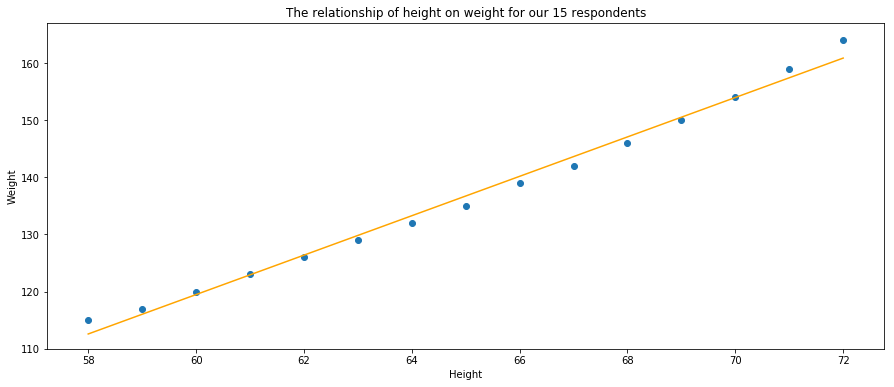

In [28]:
plt.figure(figsize=(15,6))
plt.plot(pred_data[:,0],pred_data[:,1],color="orange")
plt.scatter(data.height,data.weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("The relationship of height on weight for our 15 respondents")

Let's examine how well the predictions and the actual values map onto one another. Let's zoom in on the 15th participant and see where our prediction vector and observed vectors lie.

In [29]:
plot = vla()
plot.graph(300,dim=600)
participant = 14
plot.vector(pred_data[participant],add_color="blue",alpha=.4)
plot.vector(data.loc[participant,['height','weight']].values,add_color="black",alpha=.4)
plot.show()

#### Making predictions with new data points...

In [30]:
new_height = 50
new_x = np.array([1,new_height])
print(new_x)

# transform the new data threw our coef vector
new_pred_weight = new_x.dot(b) 
new_pred_weight


pred_vec = np.array([new_height,new_pred_weight])
pred_vec

[ 1 50]


array([50.  , 84.98])

#### What happens if we were way off?

In [31]:
pred_data[10]

array([ 68.  , 147.08])

In [32]:
fake_entry = np.array([68,90])
fake_entry

array([68, 90])

If we were to project the new data point on our prediction, what does this tell us?

In [33]:
plot.clear().graph(300,dim=600)
plot.subtract_vectors(pred_data[10],fake_entry)
plot.show()

In [34]:
# calculate the error of the data point
147.08 - 90

57.08000000000001

In [35]:
# The length of the distance between the two vectors is the same as the error between them. 
np.linalg.norm(pred_data[10] - fake_entry)

57.08000000000004

## Multiplying Matrices

What happens when we want to perform two transformation simultaneously?

<br>

$$ g \circ f: x \mapsto s \mapsto y $$

<br>

$$ g(\vec{x}) = \vec{s}$$

<br>

$$ f(\vec{s}) = y $$

<br>

We can represent this as the multiplication of two (or more) matrices.

<br>

$$ f(g(\vec{x})) = \textbf{A}_{2x2}\textbf{B}_{2x2}  \vec{x}$$

<br>

That is, we transform $\vec{x}$ by $\textbf{B}$ and then transform that resulting vector by $\textbf{A}$ much as we would with the nested function $f(g(\vec{x}))$. 

In [36]:
A

array([[ 1., -1.],
       [ 0.,  3.]])

In [37]:
B

array([[-3. ,  1. ],
       [ 0.5,  2.3]])

In [38]:
a

array([1, 2])

In [39]:
a_new = B.dot(a)
a_new

array([-1. ,  5.1])

In [40]:
A.dot(a_new)

array([-6.1, 15.3])

This is equivalent to...

In [41]:
A.dot(B).dot(a)

array([-6.1, 15.3])

#### Now visually

In [42]:
plot.clear().graph(25,grid=True)
plot.vector(a)
plot.show()

In [43]:
plot.clear()
plot.change_basis(B)
plot.graph(25,grid=True)
plot.vector(a)
plot.show()

In [44]:
plot.clear()
plot.change_basis(A.dot(B))
plot.graph(25,grid=True)
plot.vector(a)
plot.show()

In [45]:
# Let's do this all on in one go.
plot.clear().graph(25)
plot.vector(a)
plot.vector(A.dot(B).dot(a),add_color="purple")
plot.show()

### Multiplying two matrices by hand 

$$\textbf{A}_{mxn} = 
                     \begin{bmatrix}
                         \vec{a}_{1} & \vec{a}_{2} & \dots & \vec{a}_{n}\\
                     \end{bmatrix} = 
                    \begin{bmatrix} a_{11} & a_{12} & \dots & a_{1n}  \\ 
                                     a_{21}  & a_{22} & \dots & a_{2n} \\
                                     \vdots & \vdots & \ddots & \vdots \\
                                     a_{m1}  & a_{m2} & \dots & a_{mn} \\
                     \end{bmatrix} $$
                     
$$\textbf{B}_{nxk} = 
                    \begin{bmatrix}
                         \vec{b}_{1} & \vec{b}_{2} & \dots & \vec{b}_{k}\\
                     \end{bmatrix}  = 
                    \begin{bmatrix} b_{11} & b_{12} & \dots & b_{1k}  \\ 
                                     b_{21}  & b_{22} & \dots & b_{2k} \\
                                     \vdots & \vdots & \ddots & \vdots \\
                                     b_{n1}  & b_{n2} & \dots & b_{nk} \\
                     \end{bmatrix}$$
                     
Note that to multiply two matrices, their corresponding dimensions must align. Why? 

$$m \times \textbf{n}~~\textbf{n}\times k $$

Think of the $\textbf{A}$ as performing a linear transformation on each column vector of $\textbf{B}$

$$ \textbf{A}_{m \times \textbf{n}} \textbf{B}_{\textbf{n}\times k} = 
                     \begin{bmatrix}
                         \textbf{A} \vec{b}_{1} & \textbf{A} \vec{b}_{2} & \dots & \textbf{A} \vec{b}_{k}\\
                     \end{bmatrix}$$
                     
                     
$$
\begin{bmatrix}
 [a_{11} b_{11} + \dots + a_{1n} b_{n1} ] & [a_{11} b_{12} + \dots + a_{1n} b_{n2} ] & \dots & [a_{11} b_{1k} + \dots + a_{1n} b_{nk} ]\\
 \vdots & \vdots & \vdots & \vdots \\
 [a_{m1} b_{11} + \dots + a_{mn} b_{n1} ] & [a_{m1} b_{22} + \dots + a_{mn} b_{n2} ] & \dots & [a_{m1} b_{1k} + \dots + a_{mn} b_{nk} ]
\end{bmatrix}$$

$$ \textbf{A}_{m \times \textbf{n}} \textbf{B}_{\textbf{n}\times k} = \textbf{C}_{m\times k} $$

**Example**:

$$\textbf{A}_{2x3} = 
                    \begin{bmatrix} 1 & 3 & 1  \\ 
                                    0 & 1 & -1 \\
                     \end{bmatrix} $$

$$\textbf{B}_{3x2} = 
                    \begin{bmatrix} 2 & 1 \\ 
                                    -1 & -2 \\
                                    4 & 3 \\
                     \end{bmatrix} $$
                     
                     
$$ \textbf{A}_{2x3} \textbf{B}_{3x2} $$

$$ \begin{bmatrix}
   \textbf{A}\begin{bmatrix} 2  \\ -1 \\ 4 \\ \end{bmatrix} &
   \textbf{A}\begin{bmatrix} 1 \\ -2 \\ 3 \\ \end{bmatrix} 
   \end{bmatrix} $$
   
   
$$ \begin{bmatrix}
   \begin{bmatrix} 1  \\ 3 \\ 1 \\ \end{bmatrix} \begin{bmatrix} 2  \\ -1 \\ 4 \\ \end{bmatrix} &
   \begin{bmatrix} 1  \\ 3 \\ 1 \\ \end{bmatrix}\begin{bmatrix} 1 \\ -2 \\ 3 \\ \end{bmatrix} \\
   \begin{bmatrix} 0  \\ 1 \\ -1 \\ \end{bmatrix} \begin{bmatrix} 2  \\ -1 \\ 4 \\ \end{bmatrix} &
   \begin{bmatrix} 0  \\ 1 \\ -1 \\ \end{bmatrix}  \begin{bmatrix} 1 \\ -2 \\ 3 \\ \end{bmatrix} 
   \end{bmatrix} $$
   
$$ \begin{bmatrix}
    1(2) + 3(-1) + 1(4) & 1(1) + 3(-2) + 1(3)\\
    0(2) + 1(-1) + -1(4) & 0(1) + 1(-2) + -1(3)
   \end{bmatrix} $$
   
$$ \begin{bmatrix}
    3 & -2\\
    -5 & -5
   \end{bmatrix} $$

In [46]:
A = np.array([[1,3,1],[0,1,-1]])
B = np.array([[2,1],[-1,-2],[4,3]])
print(A)
print(B)

[[ 1  3  1]
 [ 0  1 -1]]
[[ 2  1]
 [-1 -2]
 [ 4  3]]


In [47]:
A.dot(B)

array([[ 3, -2],
       [-5, -5]])

## Properties of Matrix Multiplication 

<font color = "grey">~~**COMMUNITIVE**~~</font>

<font color = "grey">$$ \textbf{A} \textbf{B} \ne \textbf{B} \textbf{A}  $$  </font>


**ASSOCIATIVE**

$$(\textbf{A} \textbf{B}) \textbf{C} = \textbf{A} (\textbf{B} \textbf{C}) = \textbf{A} \textbf{B} \textbf{C} $$


**DISTRIBUTIVE**

$$\textbf{A}(\textbf{B} + \textbf{C}) = \textbf{A}\textbf{B} + \textbf{A}\textbf{C}$$

**<u>But remember it's not communicative, so order matters!</u>**